In [52]:
import pandas as pd
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('Data/LLM_Gut_Microbiome_Wide.csv')

In [47]:
# order according to columns with most data points
df.set_index('Species', inplace=True)
df.shape

(229, 159)

In [48]:
pd.set_option('display.max_rows', None); 

In [ ]:
# retain only rows of interest:
# p__Firmicutes;f__Lachnospiraceae;g__Roseburia   
# p__Firmicutes;f__Ruminococcaceae;g__Faecalibacterium 
# p__Bacteroidetes;f__Prevotellaceae;g__Prevotella  
# p__Bacteroidetes;f__Bacteroidaceae;g__Bacteroides 

df.rename(index={
    'p__Firmicutes;f__Lachnospiraceae;g__Roseburia' : 'Roseburia',
    'p__Firmicutes;f__Ruminococcaceae;g__Faecalibacterium' : 'Faecalibacterium',
    'p__Bacteroidetes;f__Prevotellaceae;g__Prevotella' : 'Prevotella',
    'p__Bacteroidetes;f__Bacteroidaceae;g__Bacteroides' : 'Bacteroides'
}, inplace=True)

# filter df to keep only species of interest
df = df.loc[['Faecalibacterium', 'Roseburia', 'Prevotella', 'Bacteroides'], :]
df

,12/28/11,4/3/12,8/7/12,11/6/12,1/26/13,2/8/13,2/5/13,3/24/13,4/7/13,4/29/13,...,4/14/19,4/28/19,5/12/19,5/19/19,6/2/19,6/16/19,6/23/19,7/14/19,7/28/19,8/11/19
Species,,,,,,,,,,,,,,,,,,,,,
Faecalibacterium,1.10,4.95,6.36,5.40,8.02,10.61,10.43,10.75,11.15,12.07,...,3.31,2.77,3.46,3.57,4.50,3.60,3.88,3.23,2.21,3.62
Roseburia,0.17,0.83,1.49,0.82,0.84,0.71,0.86,1.81,2.23,2.30,...,0.55,0.77,0.59,0.11,0.42,0.49,0.36,0.66,0.20,0.33
Prevotella,0.01,0.00,0.02,0.02,0.00,0.01,3.75,4.01,10.86,4.35,...,0.16,0.07,0.05,0.54,0.17,0.71,0.09,0.51,0.07,0.32
Bacteroides,4.18,2.10,11.18,6.31,26.44,24.14,18.35,22.05,20.30,21.51,...,10.47,13.92,7.54,9.62,10.88,8.46,10.67,5.14,0.74,9.02


In [50]:
# load hsCRP target variable from LLM_Biomarkers_Wide.csv
target_vars = pd.read_csv("Data/LLM_Biomarkers_Wide.csv")
target_vars.rename(columns={'High Sensitivity CRP (mg/L)_mg/L': 'hsCRP'}, inplace=True)

target = target_vars[['Date', 'hsCRP']].dropna()
target.shape

target.head()

,Date,hsCRP
8,2005-10-04,5.0
13,2007-11-02,6.1
14,2008-02-12,9.6
16,2008-06-19,11.8
18,2008-08-28,11.3


In [51]:
# pivot target to have hsCRP as row and dates as column
target_wide = (
    target.assign(Date=pd.to_datetime(target['Date']))
          .set_index('Date')
          .T
)

target_wide

Date,2005-10-04,2007-11-02,2008-02-12,2008-06-19,2008-08-28,2008-09-04,2008-10-20,2009-01-27,2009-03-09,2009-06-15,...,2024-05-07,2024-06-21,2024-07-24,2024-09-12,2024-11-13,2024-12-06,2025-01-29,2025-02-12,2025-05-20,2025-06-13
hsCRP,5.0,6.1,9.6,11.8,11.3,14.5,4.9,5.5,5.5,4.7,...,0.7,0.9,1.2,0.7,0.6,0.9,0.3,0.7,1.1,0.5


In [53]:
# convert the columns in target_wide and df to datetime for proper alignment
target_wide.columns = pd.to_datetime(target_wide.columns)
df.columns = pd.to_datetime(df.columns)

# take the mean by month for both df and target_wide
df_monthly_mean = df.groupby(df.columns.to_period('M'), axis=1).mean()
target_monthly_mean = target_wide.groupby(target_wide.columns.to_period('M'), axis=1).mean()

# align the two DataFrames on their columns (months)
common_months = df_monthly_mean.columns.intersection(target_monthly_mean.columns)
print("Common months for alignment:", common_months)

Common months for alignment: PeriodIndex(['2011-12', '2012-04', '2012-08', '2012-11', '2013-02', '2013-07',
             '2013-09', '2013-11', '2013-12', '2014-02', '2014-03', '2014-05',
             '2014-06', '2014-07', '2014-08', '2014-09', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-06', '2015-07',
             '2015-08', '2015-10', '2015-11', '2016-01', '2016-02', '2016-03',
             '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
             '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
             '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
             '2017-11', '2017-12', '2018-01', '2018-02', '2018-04', '2018-05',
             '2018-06', '2018-07', '2018-08', '2018-09', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08'],
            dtype='period[M]')


In [54]:
# merge the DataFrames on the common months
df_aligned = df_monthly_mean[common_months]
target_aligned = target_monthly_mean[common_months]

merged_df = pd.concat([df_aligned, target_aligned], axis=0)
 
# order the columns from earliest to latest
merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
merged_df

,2011-12,2012-04,2012-08,2012-11,2013-02,2013-07,2013-09,2013-11,2013-12,2014-02,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
Faecalibacterium,1.10,4.95,6.36,5.40,10.520,10.34,14.205,8.27,7.4,2.55,...,3.693333,4.060000,3.265,4.540,6.000,3.040,3.515,3.993333,2.72,3.62
Roseburia,0.17,0.83,1.49,0.82,0.785,0.49,0.235,0.34,0.0,0.18,...,0.530000,0.343333,0.485,0.740,0.485,0.660,0.350,0.423333,0.43,0.33
Prevotella,0.01,0.00,0.02,0.02,1.880,2.36,3.420,7.93,0.5,0.41,...,1.926667,0.636667,0.340,0.315,0.285,0.115,0.295,0.323333,0.29,0.32
Bacteroides,4.18,2.10,11.18,6.31,21.245,16.45,5.975,10.85,13.5,21.19,...,11.770000,10.710000,9.410,10.470,12.625,12.195,8.580,10.003333,2.94,9.02
hsCRP,27.10,3.45,3.00,4.30,3.700,8.30,9.300,5.00,3.3,2.70,...,1.600000,1.400000,1.000,1.000,1.300,2.600,1.300,0.800000,1.00,1.70


In [55]:
# calculate spearman correlation between each species and hsCRP
from scipy.stats import spearmanr
spearman_correlations = {}
for species in df_aligned.index:
    corr, _ = spearmanr(df_aligned.loc[species], target_aligned.loc['hsCRP'])
    spearman_correlations[species] = np.float64(corr)
pprint(spearman_correlations)

{'Bacteroides': np.float64(0.25222717163340364),
 'Faecalibacterium': np.float64(0.37589998689880627),
 'Prevotella': np.float64(0.3059067704793993),
 'Roseburia': np.float64(-0.06315770033774872)}


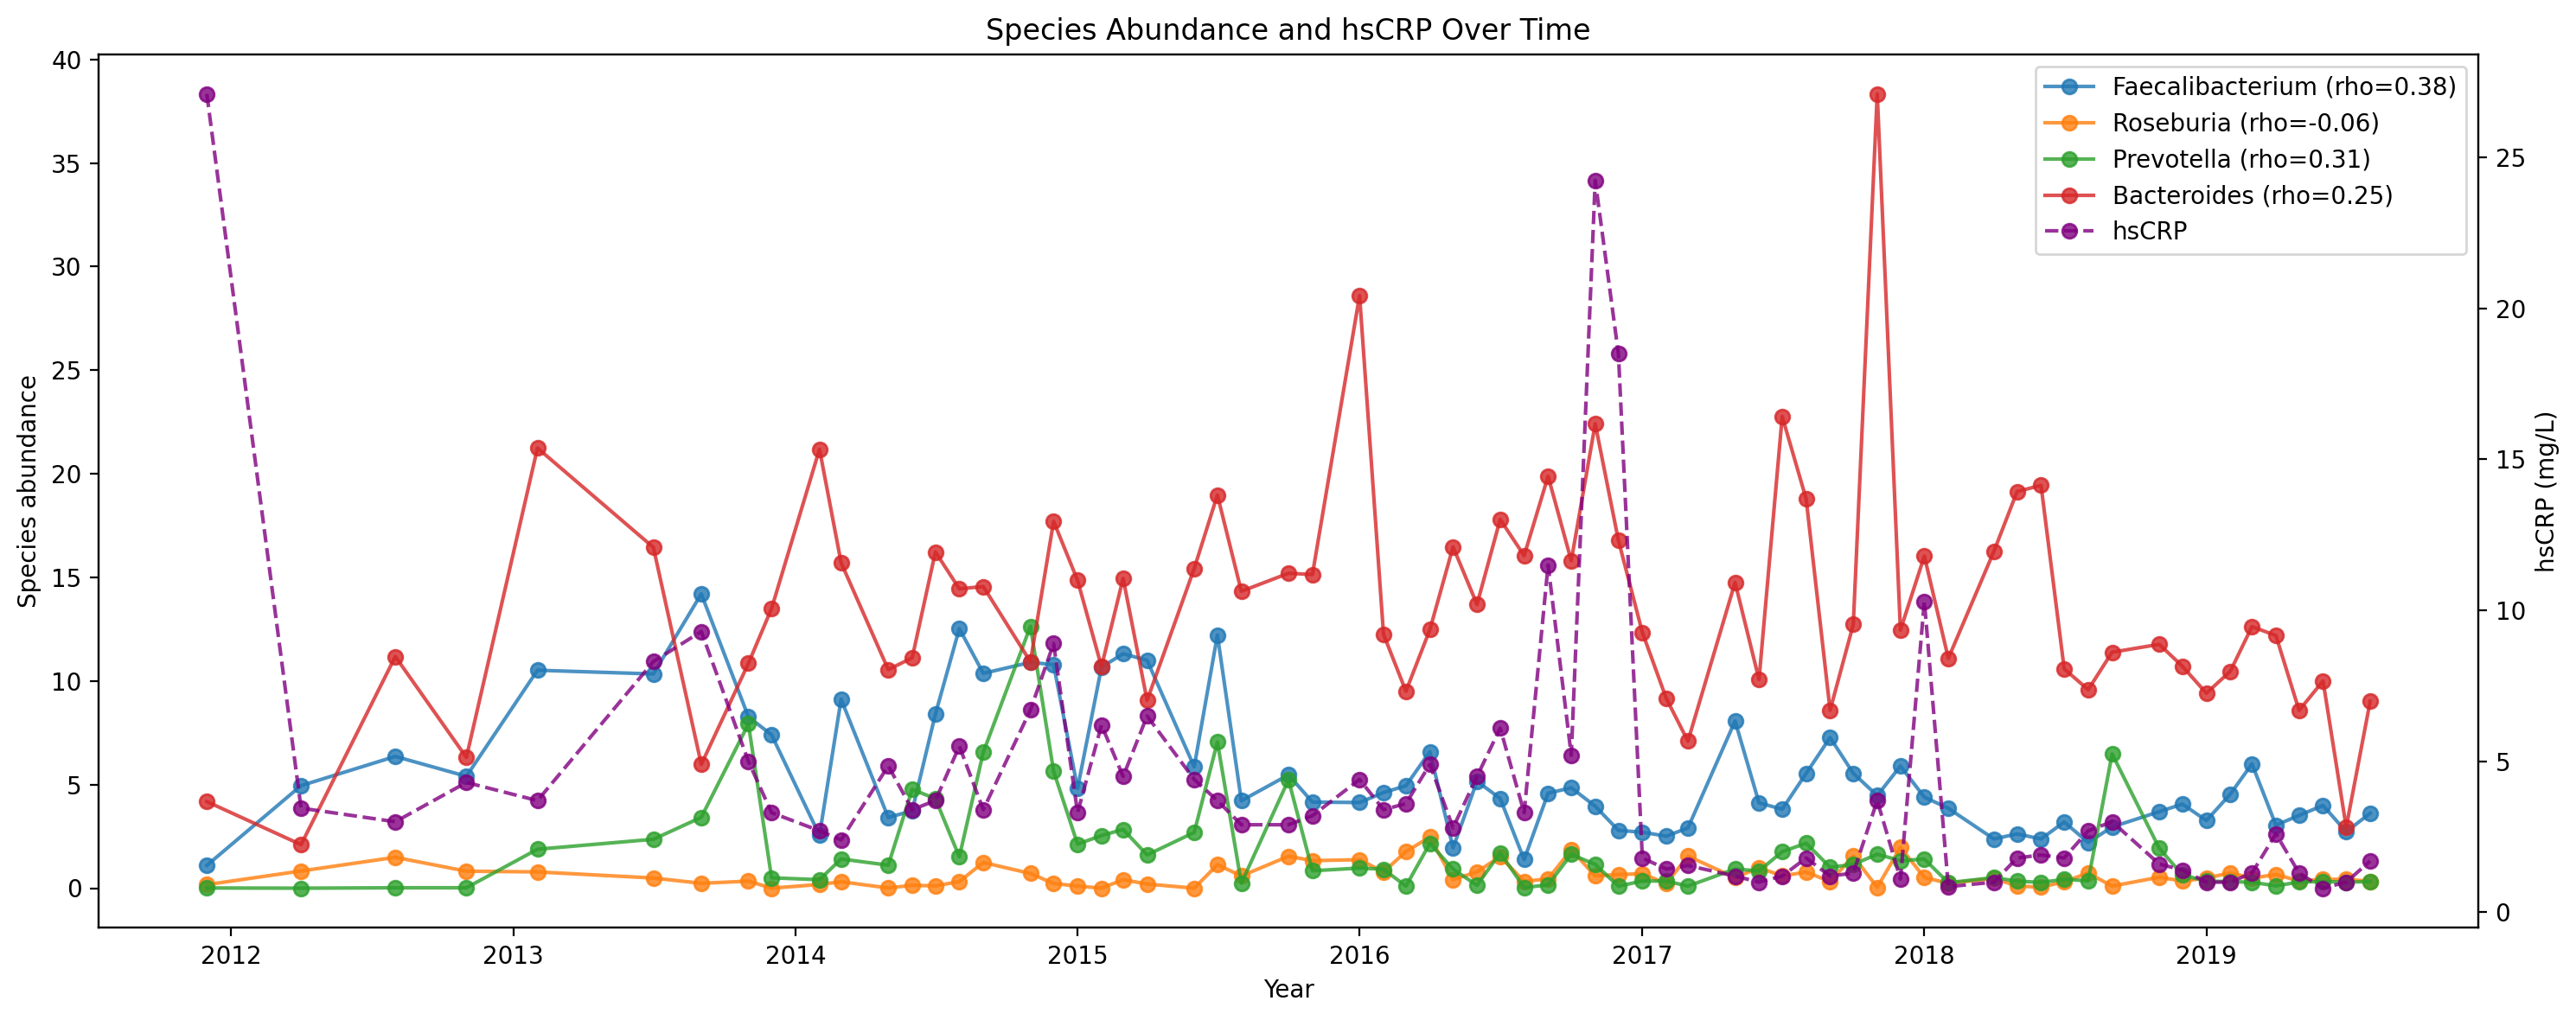

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Clean & order the data ---
df = merged_df.apply(pd.to_numeric, errors='coerce').copy()
x = pd.to_datetime(df.columns.astype(str).str.strip(), errors='coerce')
keep = ~x.isna()
x = x[keep]
df = df.loc[:, keep]
# sort by time just in case
order = np.argsort(x.values)
x = x.values[order]
df = df.iloc[:, order]

# --- Plot: species on left axis, hsCRP on right axis ---
fig, ax = plt.subplots(figsize=(15, 6), dpi=200)
ax2 = None  # will create when we hit hsCRP

for index, row in df.iterrows():
    rho = spearman_correlations.get(index) if 'spearman_correlations' in globals() else None
    label = f"{index} (rho={rho:.2f})" if rho is not None and not np.isnan(rho) else f"{index}"

    if str(index).lower() == 'hscrp':
        if ax2 is None:
            ax2 = ax.twinx()
        ax2.plot(x, row.values, marker='o', linestyle='--', label=label, color='purple', alpha=0.8)
    else:
        ax.plot(x, row.values, marker='o', label=label, alpha=0.8)

ax.set_title('Species Abundance and hsCRP Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Species abundance')
if ax2 is not None:
    ax2.set_ylabel('hsCRP (mg/L)')

# Combine legends from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = (ax2.get_legend_handles_labels() if ax2 is not None else ([], []))
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

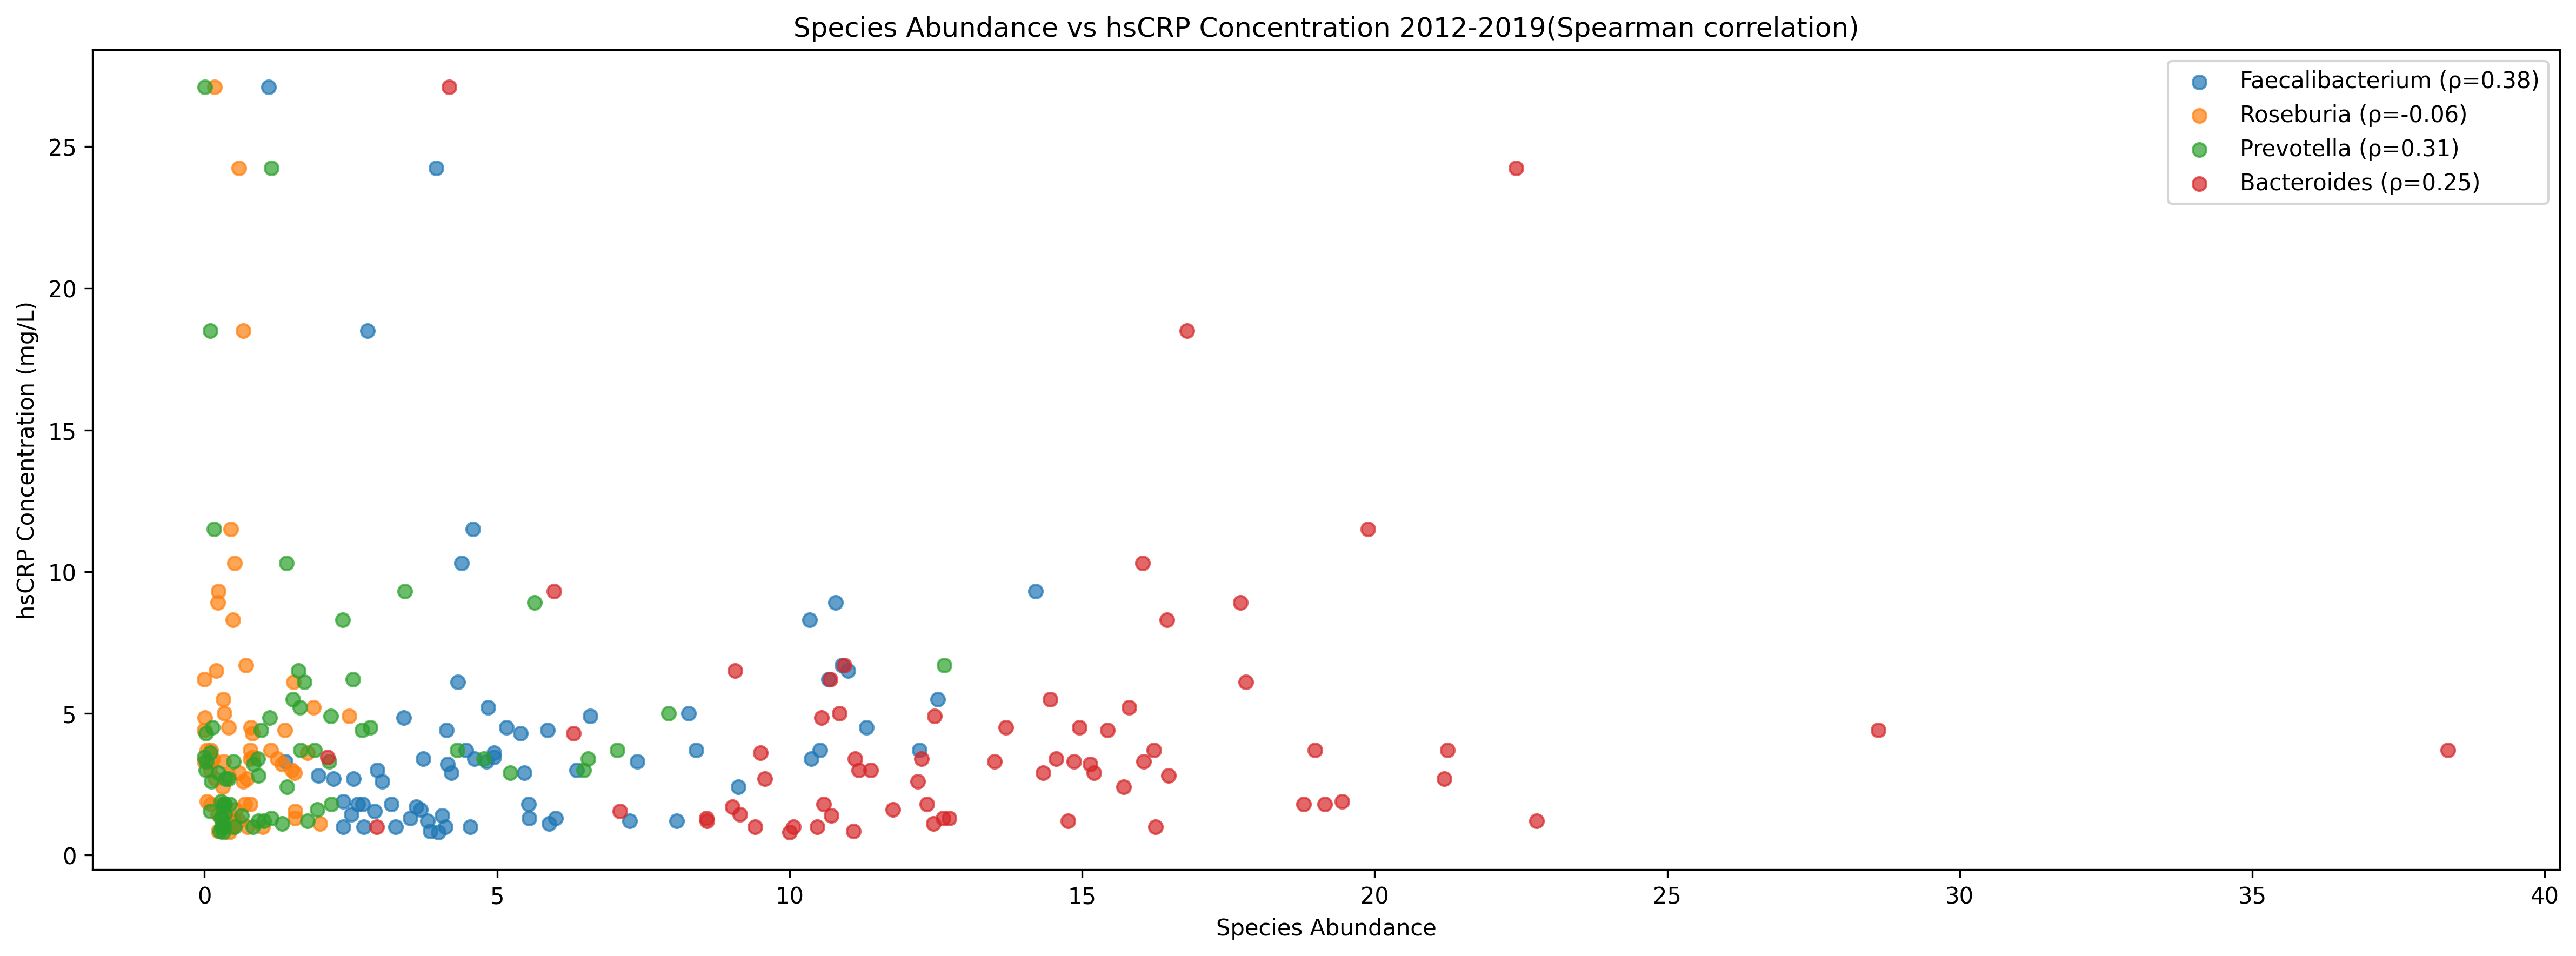

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

plt.figure(figsize=(16, 6), dpi=300)

hs = target_aligned.loc['hsCRP']

for species in df_aligned.index:
    x = df_aligned.loc[species]
    y = hs

    # Filter out NaNs to align valid pairs
    mask = (~x.isna()) & (~y.isna())
    if mask.sum() < 3:
        continue  # skip species with too few points

    rho, pval = spearmanr(x[mask], y[mask])

    plt.scatter(x[mask], y[mask], label=f"{species} (ρ={rho:.2f})", alpha=0.7)

plt.xlabel('Species Abundance')
plt.ylabel('hsCRP Concentration (mg/L)')
plt.title('Species Abundance vs hsCRP Concentration 2012-2019(Spearman correlation)')
plt.legend()
plt.tight_layout()
plt.show()